# Данные

Импортируем датасет MNIST (только тестовую его часть из 10 тыс. изображений)

In [14]:
from keras.datasets import mnist
(_, _), (X, y) = mnist.load_data()

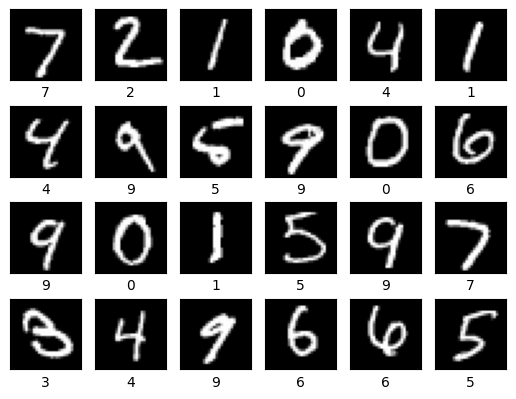

In [15]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X[i], cmap='gray')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(y[i],
                   color='black')

In [16]:
X = X.reshape(X.shape[0],-1)

# [OpenTSNE](https://opentsne.readthedocs.io/en/latest/index.html)

OpenTSNE — это достаточно большоая библиотека, реализующая модель t-SNE. Настоятельно рекомендуем ознакомиться с документацией. Там можно почерпнуть массу интересной и полезной информации по рассматриваемой теме. В том числе библиотека позволяет применять полученное преобразование к новым данным.

In [6]:
!pip install -q openTSNE
from openTSNE import TSNE as openTSNE

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 27.8 MB/s eta 0:00:00


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)
tsne = openTSNE(
    perplexity=30,
    metric="euclidean",
    n_jobs=8,
    random_state=42,
    verbose=True,
)

In [19]:
embedding_train = tsne.fit(X_train)

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=8, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 21.01 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.49 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.46 seconds
===> Running optimization with exaggeration=12.00, lr=666.67 for 250 iterations...
Iteration   50, KL divergence 4.4795, 50 iterations in 53.9185 sec
Iteration  100, KL divergence 4.5942, 50 iterations in 52.3533 sec
Iteration  150, KL divergence 4.5921, 50 iterations in 61.4955 sec
Iteration  200, KL divergence 4.5922, 50 iterations in 60.2452 sec
Iteration  250, KL divergence 4.5922, 50 iterations in 62.0326 sec
   --> Time elapsed: 290.06 seconds
===> Running optimization with exagger

In [20]:
embedding_test = embedding_train.transform(X_test)

===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 1.83 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.02 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 21719.0804, 50 iterations in 16.0024 sec
Iteration  100, KL divergence 21571.4542, 50 iterations in 14.3752 sec
Iteration  150, KL divergence 21539.7907, 50 iterations in 14.1590 sec
Iteration  200, KL divergence 21526.4810, 50 iterations in 14.2408 sec
Iteration  250, KL divergence 21523.5075, 50 iterations in 14.4656 sec
   --> Time elapsed: 73.24 seconds


<Axes: >

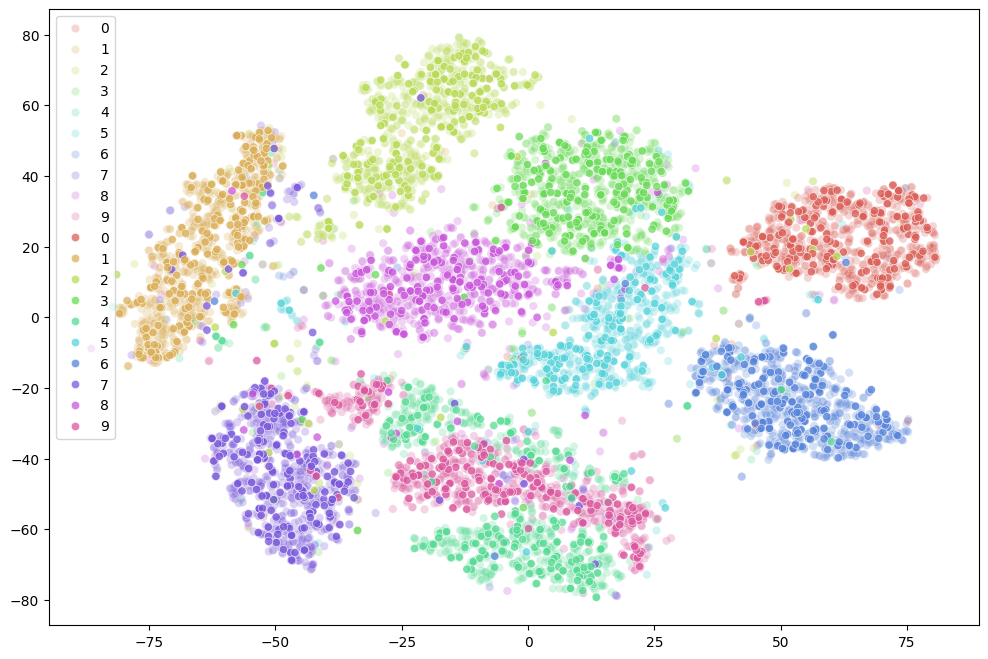

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12,8)

sns.scatterplot(x=embedding_train[:,0], y=embedding_train[:,1], palette=sns.color_palette("hls", 10), hue=y_train, alpha=0.25)
sns.scatterplot(x=embedding_test[:,0], y=embedding_test[:,1], hue=y_test, palette=sns.color_palette("hls", 10), alpha=0.75)

Видно, что тестовые данные достаточно гармонично и корректно располагаются рядом с тренировочными.

# Задание

Продемонстрируйте влияние параметров <code>perplexity</code>, `exaggeration` и <code>dof</code> на результаты понижения размерности.

Попробуйте перед анализом полученного результата по значениям гиперпараметров предположить, как будет выглядеть результат.

Проверьте, подтвердились ли ваши предположения, сделайте выводы.